### **TRABAJO FINAL**

### **Curso: "Análisis Predictivo y Gestión de Datos"**

### **Docente: Oscar Leonardo Rincón León**



## Estudio de caso

### 🧩 – Clasificación Afectación Salud Mental por uso de Pantallas Digitales

#### Contexto general: 
Este conjunto de datos explora la relación entre el uso de dispositivos digitales en tiempo frente a la pantalla (horas diarias) y diversos indicadores de salud mental. Estos datos registran los patrones de uso de teléfono móvil, portátil, tableta y televisor, algunos hábitos diarios (horas de sueño y actividad física), los niveles de estrés, ansiedad, depresión y las puntuaciones de bienestar mental. 

Con este trabajo buscamos explorar la relación entre el tiempo de exposición a pantallas digitales y la salud mental. Para ello, se tomaron 2000 casos, registrando personas en categoría de género femenino, masculino y otros, de edades comprendidas entre 13 y 64 años, ubicadas en zonas urbana, suburbana y rural.
Con este trabajo buscamos explorar la relación entre el tiempo de exposición a pantallas digitales y la salud mental.

### **Pregunta:** ¿Cuál es la probabilidad de tener una alta afectación de salud mental por el uso de pantallas digitales con una intensidad mayor o igual a 12 horas?.


[Esta base de datos se tomo de la página Kaggle](https://www.kaggle.com/datasets/khushikyad001/impact-of-screen-time-on-mental-health/data) 
Conforme a la página, obtuvimos la siguiente información:     

**Fuentes:** Este conjunto de datos se genera sintéticamente utilizando las bibliotecas NumPy y Pandas de Python. Los valores se obtuvieron de distribuciones estadísticas inspiradas en el mundo real, derivadas de investigaciones académicas y encuestas de bienestar (p. ej., estudios de los CDC, la OMS y Pew Research).
No se recopilaron ni utilizaron datos reales de usuarios.

**Metodología de recolección:** El conjunto de datos se simuló utilizando distribuciones normales, uniformes y categóricas para reflejar un comportamiento realista. Las restricciones como los rangos de edad, las normas típicas de tiempo frente a la pantalla y las puntuaciones de estado de ánimo se modelaron a partir de estudios publicados sobre salud conductual. Los valores son consistentes internamente; por ejemplo, tiempo total frente a la pantalla ≈ suma del tiempo de uso del dispositivo. Nota: Si bien estos datos son sintéticos, su objetivo es imitar patrones de comportamiento del mundo real para fines de investigación y análisis.


#### **🔍 1. EXPLORACIÓN INICIAL DE LOS DATOS**

📊  **Importar Librerías y cargue de conjunto de datos**

In [1421]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset 
df = pd.read_csv('../datos/dt4_salud_mental.csv')
df.head(6)

,user_id,Edad,Genero,Tipo_ubicacion,Hr_pantallas,Hr_uso_movil,Hr_uso_portatil,Hr_uso_tablet,Hr_uso_tv,Hr_sueño,Nivel_stress,Actividad_fisica,Puntuacion_salud_mental,Nivel_ansiedad,Nivel_depresion
0,1,51,Femenino,Urbano,7.9,3.4,1.3,1.6,1.6,6.6,10.0,0.7,32,13,15
1,2,64,Masculino,Suburbano,8.2,3.5,1.8,0.9,2.0,4.5,6.0,4.3,75,19,18
2,3,41,Otro,Suburbano,7.6,2.1,2.6,0.7,2.2,7.1,5.0,3.1,22,7,3
3,4,27,Otro,Rural,3.2,0.0,0.0,0.7,2.5,5.1,5.0,0.0,22,7,2
4,5,55,Masculino,Urbano,5.9,1.7,1.1,1.5,1.6,7.4,7.0,3.0,64,8,10
5,6,20,Femenino,Suburbano,10.4,3.2,2.7,1.2,3.3,6.0,2.0,3.3,72,17,16


**📅 Revisión estructura del dataset**

In [1422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         2000 non-null   int64  
 1   Edad                            2000 non-null   int64  
 2   Genero                          2000 non-null   object 
 3   Tipo_ubicacion                  2000 non-null   object 
 4   Hr_pantallas                    2000 non-null   float64
 5   Hr_uso_movil                    2000 non-null   float64
 6   Hr_uso_portatil                 2000 non-null   float64
 7   Hr_uso_tablet                   2000 non-null   float64
 8   Hr_uso_tv                       2000 non-null   float64
 9   Hr_sueño                        2000 non-null   float64
 10  Nivel_stress                    2000 non-null   float64
 11  Actividad_fisica                2000 non-null   float64
 12  Puntuacion_salud_mental         20

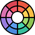**Descripción estadística general**

In [1423]:
df.describe(include='all')

,user_id,Edad,Genero,Tipo_ubicacion,Hr_pantallas,Hr_uso_movil,Hr_uso_portatil,Hr_uso_tablet,Hr_uso_tv,Hr_sueño,Nivel_stress,Actividad_fisica,Puntuacion_salud_mental,Nivel_ansiedad,Nivel_depresion
count,2000.000000,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
unique,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Femenino,Urbano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,935,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1000.500000,38.805500,NaN,NaN,7.523000,3.023700,1.999950,0.995650,1.503700,6.537550,5.541500,3.087150,49.650500,9.887500,10.04900
std,577.494589,14.929203,NaN,NaN,2.049783,1.449399,0.997949,0.492714,0.959003,1.203856,2.885731,1.885258,17.546717,6.027853,6.05334
min,1.000000,13.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,20.000000,0.000000,0.00000
25%,500.750000,26.000000,NaN,NaN,6.100000,2.000000,1.300000,0.600000,0.800000,5.700000,3.000000,1.600000,35.000000,5.000000,5.00000
50%,1000.500000,39.000000,NaN,NaN,7.500000,3.000000,2.000000,1.000000,1.500000,6.600000,6.000000,3.000000,49.000000,10.000000,10.00000
75%,1500.250000,51.000000,NaN,NaN,8.900000,4.000000,2.700000,1.300000,2.200000,7.400000,8.000000,4.400000,64.250000,15.000000,15.00000


#### 🔍**2. VISUALIZACIÓN EXPLORATORIA DE LOS DATOS**

**Gráfica 1: Distribución por Género**

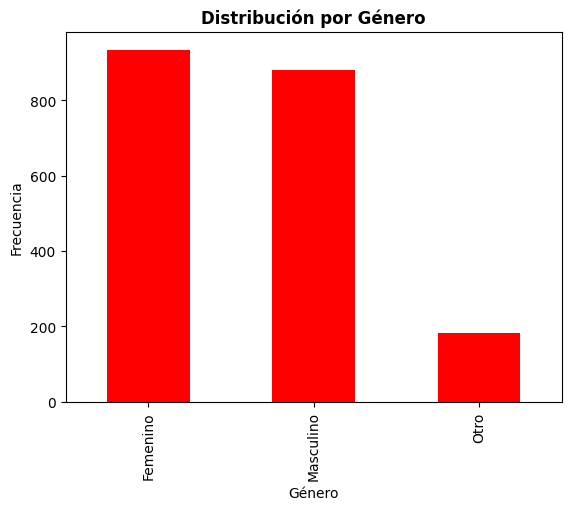

In [1424]:
df['Genero'].value_counts().plot(kind='bar', color="red")
plt.title('Distribución por Género', fontsize=12, fontweight="bold")
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación**: Este gráfico nos muestra la distribución de los datos por la categoría **Género** de la base de datos a explorar. Es muy importante tener la categoría **"Otro"**, ya que influye en la tendencia o probabilidad que queremos descubrir. 
Esta categoria nos indica que tenemos 935 casos como "Femenino", 882 como "Masculino" y 183 como "Otro", para un total de 2000 casos a estudiar. 

**Gráfico 2: Histograma de Edades**

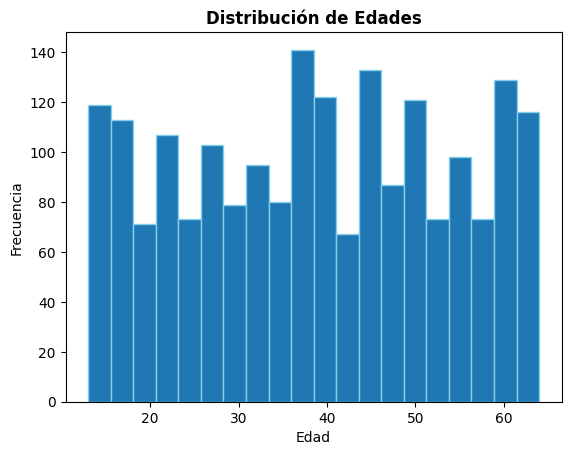

In [1425]:
df['Edad'].dropna().plot(kind='hist', bins=20, edgecolor='skyblue')
plt.title('Distribución de Edades', fontsize=12, fontweight="bold")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación:**
Esta gráfica nos muestra que la distribución de edades corresponde a una distribución No normal, ya que no se observa una forma de campana simétrica ni un único pico central. Observamos múltiples picos en diferentes rangos de edad, lo que sugiere una distribución multimodal. La frecuencia de edades varía de forma significativa entre los distintos intervalos, sin una transición suave hacia los extremos, lo que indica que los datos de edad están distribuidos de manera irregular, posiblemente por la presencia de varios grupos etarios diferenciados dentro de la base de datos.

**Gráfico 3: Boxplot de Horas Pantallas por Género**

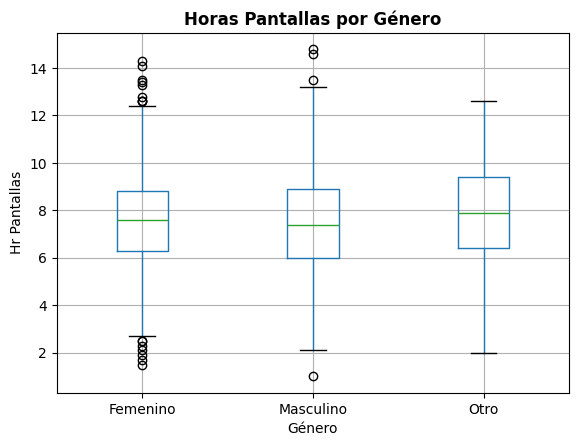

In [1426]:
df.boxplot(column='Hr_pantallas', by='Genero')
plt.title('Horas Pantallas por Género', fontsize=12, fontweight="bold")
plt.suptitle('')
plt.xlabel('Género')
plt.ylabel('Hr Pantallas')
plt.show()

**Interpretación:**
Este diagrama de caja nos muestra la distribución de las horas de uso de pantallas según el género, se puede identificar que las tres categorías presentan distribuciones similares, con Medianas alrededor de las 7 a 8 horas. Se observa una ligera tendencia a que el grupo "Otro" tiene una mediana un poco más alta. La categoria Femenino evidencia de manera significativa valores atípicos por encima de las 12 horas y por debajo de las 3 horas.

**Gráfico 4: Boxplot de Horas sueño por Género**

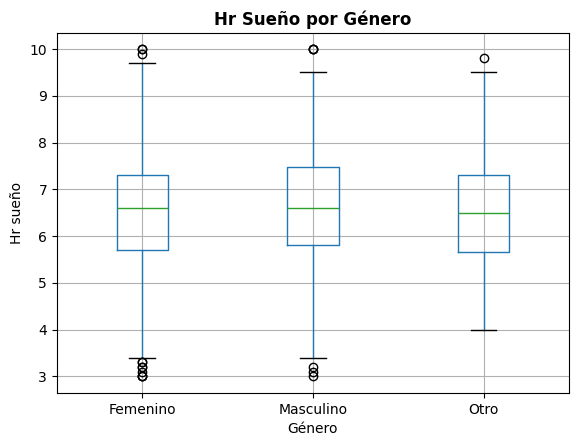

In [1427]:
df.boxplot(column='Hr_sueño', by='Genero')
plt.title('Hr Sueño por Género', fontsize=12, fontweight="bold")
plt.suptitle('')
plt.xlabel('Género')
plt.ylabel('Hr sueño')
plt.show()

**Interpretación:**
Este diagrama de caja evidencia que la Mediana tiene valores entre 6.5 y 7 horas. La categoría Masculino registra un mayor número de horas sueño frente a las otras dos categorías en promedio. Las tres categorías tienen rangos similares (~6 a 8 horas), lo que indica que la mayoría de las personas, sin importar el género, duermen entre 6 y 8 horas. Todas las tres categorías muestran valores extremos (outliers) por debajo de 4 y por encima de 9 horas. Hay individuos que duermen menos de 4 horas o más de 9, especialmente en el grupo Femenino y Masculino. Igualmente, los rangos son bastante amplios: desde ~3 horas hasta ~10 horas en todas las categorías de Género.

**Gráfico 5: Boxplot de Nivel de Stress por Género**

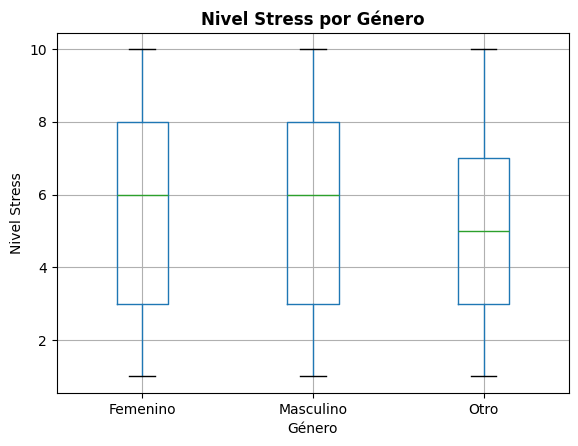

In [1428]:
df.boxplot(column='Nivel_stress', by='Genero')
plt.title('Nivel Stress por Género', fontsize=12, fontweight="bold")
plt.suptitle('')
plt.xlabel('Género')
plt.ylabel('Nivel Stress')
plt.show()

**Interpretación:**
 las cajas y bigotes alargados indican que hay una variabilidad en las puntuaciones de estrés dentro de cada categoría de género, esto significa que, dentro de cada grupo, las personas reportaron una amplia gama de niveles de estrés. Las cajas alargadas indican que los valores centrales están  dispersos.

**Gráfico 6: Boxplot de Puntuación Salud Mental por Género**

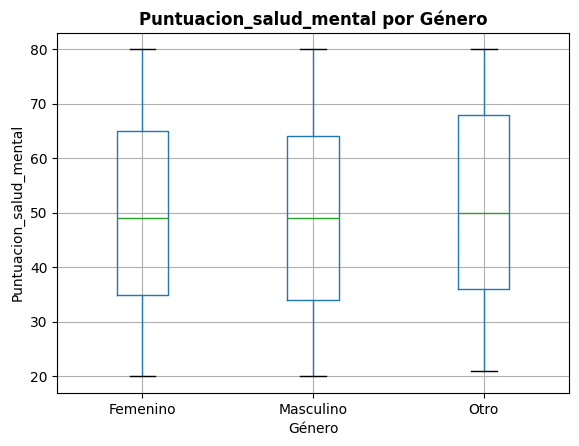

In [1429]:
df.columns = df.columns.str.strip()
df.boxplot(column='Puntuacion_salud_mental', by='Genero')
plt.title('Puntuacion_salud_mental por Género', fontsize=12, fontweight="bold")
plt.suptitle('')
plt.xlabel('Género')
plt.ylabel('Puntuacion_salud_mental')
plt.show()

**Interpretación:**
Podemos observar que no hay diferencias marcadas entre las categorías Femenino y Masculino en cuanto a puntuación de salud mental. La categpría "Otro" presenta una Mediana un poco mayor, lo cual podría indicar una mayor afectación de salud mental en promedio. La variabilidad es alta en todas las tres categorías, lo que refleja una gran diversidad en el estado de salud mental de cada persona. 
 
 

**Gráfico 7: Boxplot de Horas Pantallas por Género**

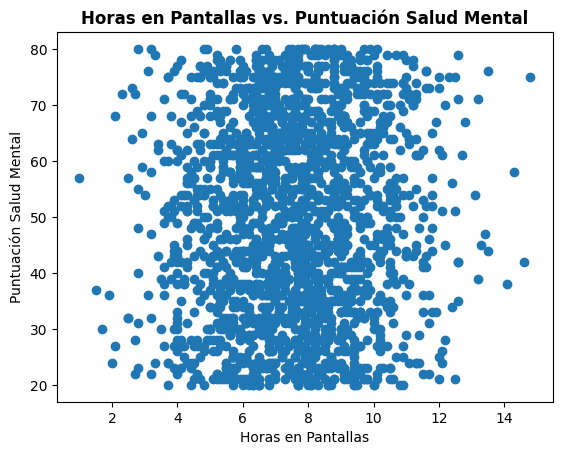

In [1430]:
df.columns = df.columns.str.strip()
plt.scatter(df['Hr_pantallas'], df['Puntuacion_salud_mental'])
plt.title('Horas en Pantallas vs. Puntuación Salud Mental', fontsize=12, fontweight="bold")
plt.xlabel('Horas en Pantallas')
plt.ylabel('Puntuación Salud Mental')
plt.show()

**Interpretación:**
Este gráfico de dispersión nos muestra un aglomerado de puntos que representa la relación entre las horas diarias que las personas pasan frente a pantallas y su puntuación en salud mental. No se observa una tendencia clara dado que los puntos están muy dispersos y distribuidos en todo el rango de horas y de puntuaciones de salud mental (de 20 a 80). Lo que indica que no existe una relación lineal fuerte entre el uso de pantallas y la puntuación de salud mental.

**Gráfico 8: Promedio uso de los Dispositivos de Pantallas Digitales**

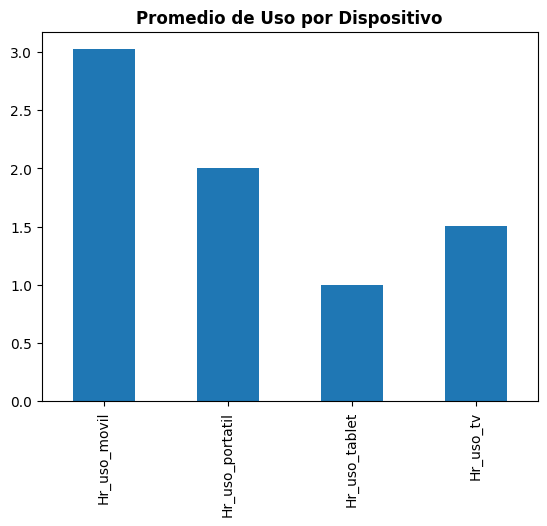

In [1431]:
uso_dispositivos = df[['Hr_uso_movil', 'Hr_uso_portatil', 'Hr_uso_tablet', 'Hr_uso_tv']].mean()
uso_dispositivos.plot(kind='bar')
plt.title('Promedio de Uso por Dispositivo', fontsize=12, fontweight="bold")
plt.show()

**Interpretación:**
Este gráfico de barras nos muestra el promedio de uso diario por tipo de dispositivo, en horas, siendo el teléfono móvil quien domina el tiempo de pantalla diario (3Hr), con una diferencia notable respecto a otros dispositivos. El uso del portátil también es significativo (2Hr). TV y tablet tienen un uso más limitado.

**Gráfico 9: Boxplot de  Distribución Nivel de Ansiedad y Depresión por Género**

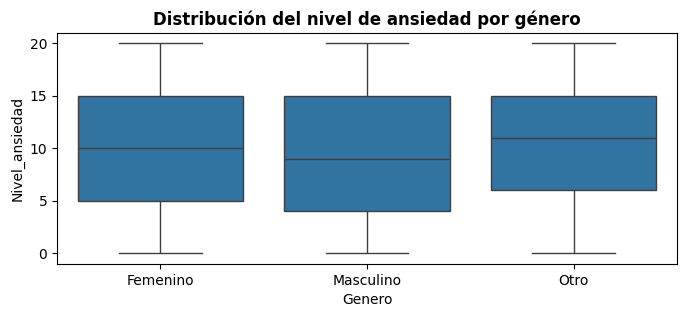

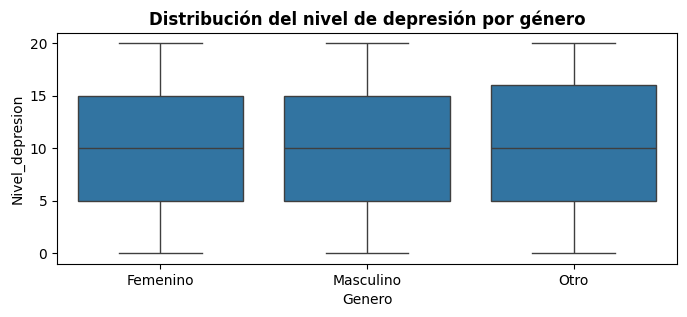

In [1432]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nivel de ansiedad por género
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x='Genero', y='Nivel_ansiedad')
plt.title('Distribución del nivel de ansiedad por género', fontsize=12, fontweight="bold")
plt.show()

# Nivel de depresión por género
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x='Genero', y='Nivel_depresion')
plt.title('Distribución del nivel de depresión por género', fontsize=12, fontweight="bold")
plt.show()

**Interpretación:**
Podemos observar que la distribución de los niveles de ansiedad y depresión son muy similares entre las tres categorías de género. Las medianas están en torno al mismo valor (aproximadamente entre 9 y 10 respectivamente). Para la categpría Otro los niveles de depresión son más altos frente a las demás categorias. 

**Gráfico 10: Gráfico de Barras Promedio Nivel de Ansiedad y Depresión por Género**

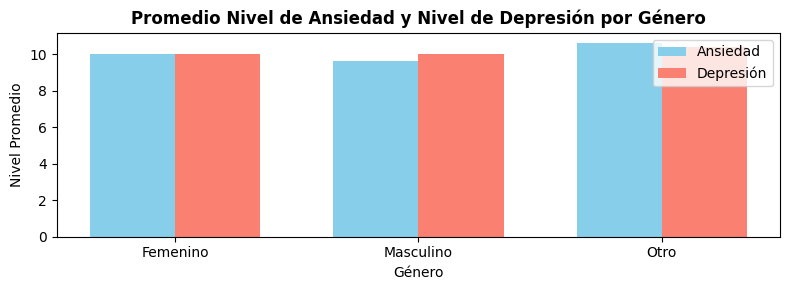

In [1433]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por género y calcular promedios
promedios = df.groupby('Genero')[['Nivel_ansiedad', 'Nivel_depresion']].mean().reset_index()

# Configurar los datos para el gráfico
generos = promedios['Genero']
ansiedad = promedios['Nivel_ansiedad']
depresion = promedios['Nivel_depresion']

# Posiciones en el eje X
x = range(len(generos))
ancho = 0.35  # ancho de las barras

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 3))
ax.bar([i - ancho/2 for i in x], ansiedad, width=ancho, label='Ansiedad', color='skyblue')
ax.bar([i + ancho/2 for i in x], depresion, width=ancho, label='Depresión', color='salmon')

# Etiquetas y leyenda
ax.set_xlabel('Género')
ax.set_ylabel('Nivel Promedio')
ax.set_title('Promedio Nivel de Ansiedad y Nivel de Depresión por Género', fontsize=12, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(generos)
ax.legend()

plt.tight_layout()
plt.show()

**Interpretación:**
Este gráfico compara los niveles promedio de ansiedad y depresión para tres categorías de género: Femenino, Masculino y Otro. Nos muestra que las categorías Femenino y Masculino registran en ansiedad y depresión un valor muy similar, cercano a 10, sin embargo la categoría Masculino en ansiedad nos muestra un promedio ligeramente inferior al nivel de depresión. La categoría Otro nos muestra niveles de ansiedad y depresión más altos, podrían estar experimentando los niveles más altos de malestar emocional. Los niveles promedio de ansiedad y depresión son altos en todos los géneros.
 

#### 🔍**3. CREACIÓN VARIABLE OBJETIVO**

[Para catagorizar la variable **"Puntuación_salud_mental"**, nos basamos en información tomada de la **Escala de Depresión de Zung (ZDS)**, la cual es una herramienta de evaluación que define el instrumento aplicado en un rango de resultados, con una puntuación que puede oscilar entre 20 a 80 puntos](https://es.wikipedia.org/wiki/Escala_de_Depresi%C3%B3n_de_Zung#:~:text=Esta%20escala%20tiene%20el%20objetivo,al%20paciente%20de%20forma%20inmediata.&text=1.,Me%20canso%20por%20cualquier%20cosa.&text=11.,mismas%20cosas%20que%20sol%C3%ADan%20agradarme.)

In [1434]:
# Crear variable objetivo: Alta Afectación Mental

# Categorias Afectación Mental:
# 0-27 puntos = Ausencia de Afectación Mental
# 28-41 puntos = Baja Afectación Mental
# 42-53 puntos = Moderada Afectación Mental
# 54-80 puntos = Alta Afectación Mental

df.columns = df.columns.str.strip()
var1 = df["Puntuacion_salud_mental"] >= 54
var2 = df["Hr_pantallas"] >= 12
df["Alta_Afectacion_Mental"] = ((var1) & (var2)).astype(int)

df.head(6)

,user_id,Edad,Genero,Tipo_ubicacion,Hr_pantallas,Hr_uso_movil,Hr_uso_portatil,Hr_uso_tablet,Hr_uso_tv,Hr_sueño,Nivel_stress,Actividad_fisica,Puntuacion_salud_mental,Nivel_ansiedad,Nivel_depresion,Alta_Afectacion_Mental
0,1,51,Femenino,Urbano,7.9,3.4,1.3,1.6,1.6,6.6,10.0,0.7,32,13,15,0
1,2,64,Masculino,Suburbano,8.2,3.5,1.8,0.9,2.0,4.5,6.0,4.3,75,19,18,0
2,3,41,Otro,Suburbano,7.6,2.1,2.6,0.7,2.2,7.1,5.0,3.1,22,7,3,0
3,4,27,Otro,Rural,3.2,0.0,0.0,0.7,2.5,5.1,5.0,0.0,22,7,2,0
4,5,55,Masculino,Urbano,5.9,1.7,1.1,1.5,1.6,7.4,7.0,3.0,64,8,10,0
5,6,20,Femenino,Suburbano,10.4,3.2,2.7,1.2,3.3,6.0,2.0,3.3,72,17,16,0


**Interpretación:** 

#### 🔍 **4. EVALUACIÓN DEL MODELO ANTES DE LIMPIAR LOS DATOS**

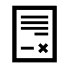**MODELO DE REGRESIÓN LOGÍSTICA**

In [1435]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
Xb = df[["Hr_sueño", "Nivel_stress", "Actividad_fisica", "Nivel_ansiedad", "Nivel_depresion"]]
yb = df["Alta_Afectacion_Mental"]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("✅ Exactitud antes de la limpieza:", round(acc_before, 4))

✅ Exactitud antes de la limpieza: 0.99


**Interpretación:**
Este valor indica que el modelo de regresión logística logró una **exactitud del 99%** al predecir si una persona tiene o no Alta Afectación Mental, utilizando únicamente las variables "Hr_pantallas" y "Puntuación Mental" y sin aplicar limpieza, imputación o transformación de los datos.
 
En este caso, el modelo acertó en aproximadamente 99 de cada 100 predicciones.

El modelo muestra un rendimiento alto en términos de exactitud.
Este valor sugiere que el modelo está capturando patrones relevantes en los datos, incluso sin haber aplicado limpieza o transformaciones previas.
Sin embargo, concluimos que este resultado no garantiza un buen desempeño, debemos verificar si las clases están balanceadas y complementar con otras métricas para obtener una evaluación precisa del modelo. 

**PREPARACIÓN DEL DATASET: LIMPIEZA Y CODIFICACIÓN**




In [1436]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df_clean = df.copy()

# Codificación de variables categóricas
df_clean = pd.get_dummies(df_clean, columns=['Genero', 'Tipo_ubicacion'], drop_first=True)

# Escalado
scaler = MinMaxScaler()
df_clean[["Hr_pantallas", "Puntuacion_salud_mental", "Hr_sueño", "Nivel_stress", "Actividad_fisica", "Nivel_ansiedad", "Nivel_depresion"]] = scaler.fit_transform(df_clean[["Hr_pantallas", "Puntuacion_salud_mental","Hr_sueño", "Nivel_stress", "Actividad_fisica", "Nivel_ansiedad", "Nivel_depresion"]])



 **EVALUACIÓN DEL MODELO DESPUES DE LA LIMPIEZA**



In [1437]:
Xc = df_clean.drop(columns=['user_id', 'Hr_pantallas','Puntuacion_salud_mental', 'Alta_Afectacion_Mental'])
yc = df_clean['Alta_Afectacion_Mental']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

model_after = LogisticRegression(max_iter=1000)
model_after.fit(Xc_train, yc_train)
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

#Evaluar con más métricas
from sklearn.metrics import classification_report, confusion_matrix

# Reporte de clasificación
print("\n📈 Reporte de clasificación después de la limpieza:")
print(classification_report(yc_test, yc_pred))

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))


📈 Reporte de clasificación después de la limpieza:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       594
           1       0.67      0.33      0.44         6

    accuracy                           0.99       600
   macro avg       0.83      0.67      0.72       600
weighted avg       0.99      0.99      0.99       600

✅ Exactitud después de la limpieza: 0.9917


**Interpretación:** 

**Exactitud des pues de la limpieza: 99.17%**, significa que el modelo clasifica correctamente el 99% de las observaciones en el conjunto de datos. 

**Clase 0 (No afectación mental):**
Precision: 0.99 → 99% de las veces que el modelo predijo "no afectado", acertó.
Recall: 1.00 → Detectó correctamente al 100% de los que realmente no estaban afectados.
F1-score: 1.00 → Muy buen desempeño general para esta clase.
Support: 594 personas es la clase mayoritaria por lo que domina el desempeño del modelo. 

##### **Clase 1 (Alta afectación mental):**
**Precision: 0.67** → De todas las predicciones que el modelo clasificó como positivas, sólo el 67% fueron correctas.

**Recall: 0.33** → Solo detectó correctamente el 33% de los afectados reales (muy bajo).

**F1-score: 0.44** → Desempeño pobre en esta clase. Este valor refleja un equilibrio bajo entre precisión y recall, destacando que el modelo tiene dificultades tanto para identificar correctamente las instancias positivas como para evitar falsas alarmas.

**Support:** 06 personas.

**Conclusiones:**

Aunque el modelo tiene un buen desempeño general, **falla en su objetivo central**: detectar a quienes tienen Alta Afectación Mental.

El modelo **ignora a la mayoría de los casos positivos**, lo que lo hace poco útil en términos prácticos.

El modelo clasifica muy bien la clase mayoritaria (0).
El preprocesamiento (limpieza y escalado) mejoró ligeramente la exactitud (de 0.99 a 0.9917).

La hipótesis propuesta donde se asume que las horas de pantalla mayor o igual a 12 horas condicionan el puntaje de Alto Afectación Mental no es completamente acertada, porque al parecer existen más variables que condicionan la variable de puntuación de salud mental. 

#### **🔍 5. EXPLORACIÓN Y VISUALIZACIÓN DE PATRONES**

**Visualización univariada: distribuciones**

##### **📊 Análisis de la distribución de Edad**

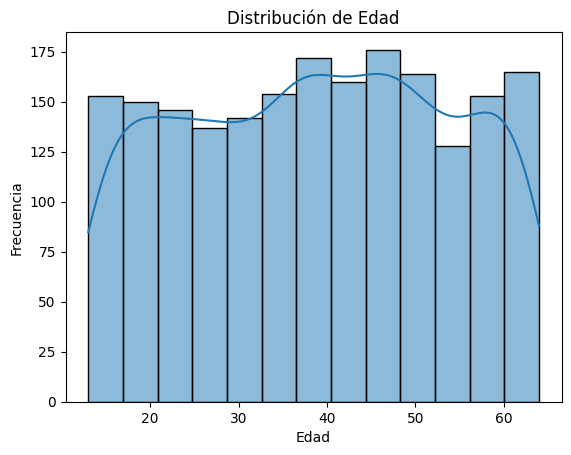

In [1438]:
# Histograma de Edad
sns.histplot(df['Edad'], kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación:**
Es un histograma con una línea de densidad (KDE) superpuesta. Distribución relativamente uniforme. La mayoría de los grupos de edad tienen una frecuencia similar, en torno a 130-170 personas. No hay grandes desequilibrios entre grupos, lo cual indica una buena representación de diferentes edades. Leve concentración entre 40 y 50 años. Esto da una perspectiva completa de distintas etapas de vida. KDE con ligera bimodalidad. La curva azul muestra una forma ondulada, lo cual puede sugerir dos grupos predominantes de edad (posiblemente entre 15-20 años y entre 40-50 años). Aunque no hay picos extremos, sí hay ondulaciones visibles. La variable edad está bien distribuida y no presenta sesgos fuertes. 


##### **📦 Análisis del boxplot de Horas Pantalla**

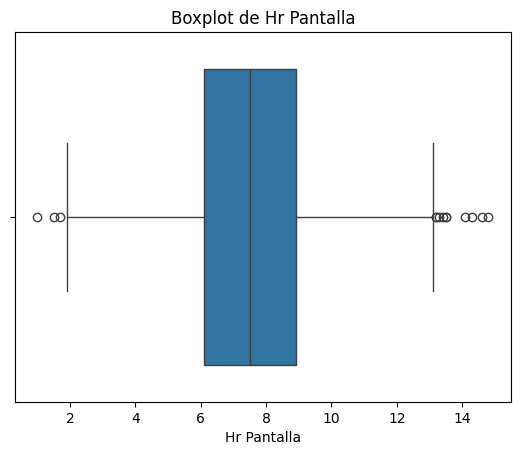

In [1439]:
# Boxplot de Horas Pantalla
sns.boxplot(x=df['Hr_pantallas'])
plt.title('Boxplot de Hr Pantalla')
plt.xlabel('Hr Pantalla')
plt.show()

**Interpretación:**
Horas Pantallas contiene valores atípicos que deben monitorearse al aplicar modelos de Regresión o KNN.


##### **🔁 Análisis de dispersión: Edad vs Horas Pantalla**

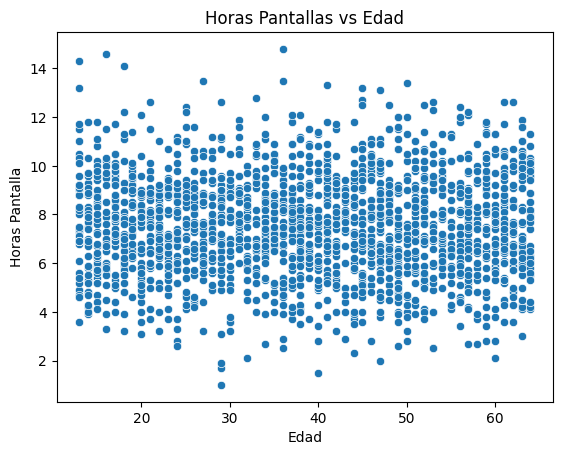

In [1440]:
# Dispersión entre Edad y Horas Pantalla
sns.scatterplot(x='Edad', y='Hr_pantallas', data=df)
plt.title('Horas Pantallas vs Edad')
plt.xlabel('Edad')
plt.ylabel('Horas Pantalla')
plt.show()

**Interpretación:**
No se observa una tendencia clara entre la edad y las horas de uso de pantallas. Los puntos están dispersos de forma bastante homogénea en todo el rango de edad. La mayoría de los puntos están entre 6 y 10 horas de pantalla diarias, sin importar la edad. Hay puntos aislados con más de 13 horas de uso o menos de 3, pero son pocos y pueden considerarse como valores atípicos.

 

##### **🔁 Análisis de dispersión: Puntuación Salud Mental vs Horas de Sueño**

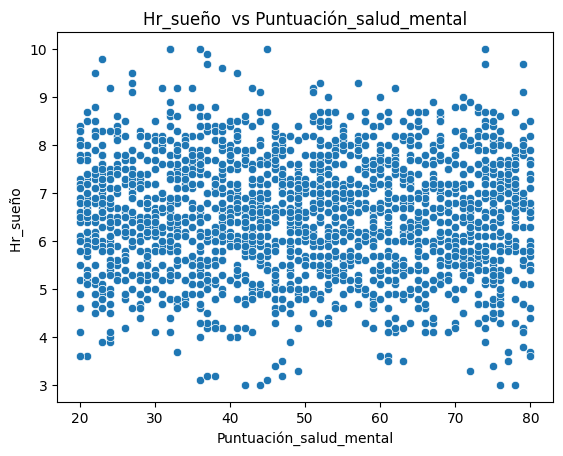

In [1441]:
# Dispersión entre Puntuación_salud_mental y Hr_sueño 
sns.scatterplot(x='Puntuacion_salud_mental', y='Hr_sueño', data=df)
plt.title('Hr_sueño  vs Puntuación_salud_mental')
plt.xlabel('Puntuación_salud_mental')
plt.ylabel('Hr_sueño ')
plt.show()

**Interpretación:**
No se observa una relación clara entre las horas de sueño y la puntuación de salud mental. La distribución de los puntos es muy dispersa y horizontal, lo que indica ausencia de correlación lineal aparente. La mayoría de los puntos están agrupados entre 6 y 7 horas de sueño y entre 40 y 70 puntos de salud mental.


##### **🔁 Mapa de calor de correlaciones numéricas**

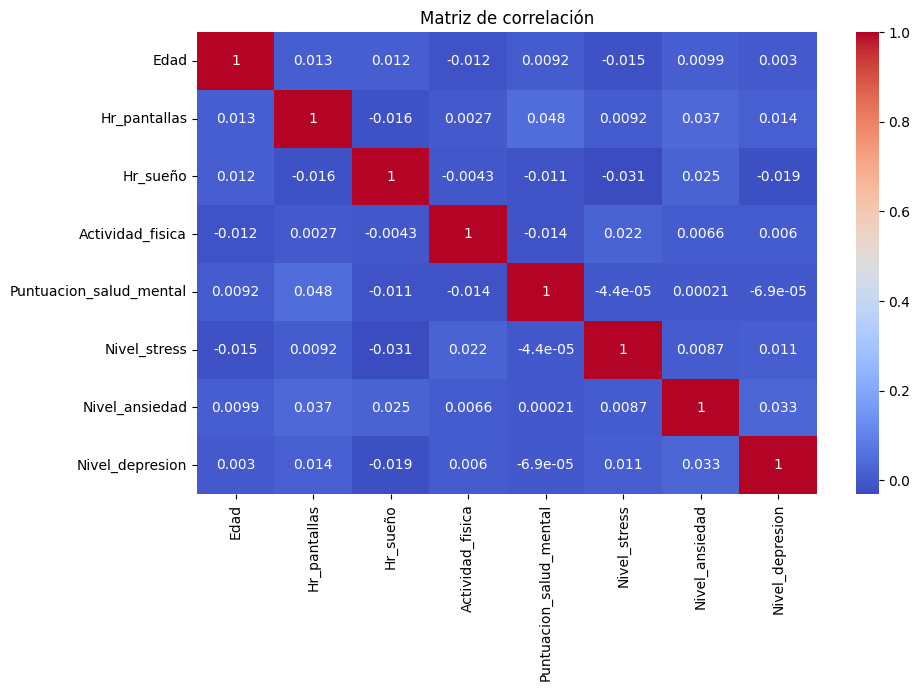

In [1442]:
 #Mapa de calor de correlaciones numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df[["Edad", "Hr_pantallas", "Hr_sueño", "Actividad_fisica", "Puntuacion_salud_mental", "Nivel_stress", "Nivel_ansiedad", "Nivel_depresion" ]].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

**Intrpretación:**
No hay multicolinealidad entre variables.
La mayoría de los coeficientes están cerca de 0, lo que indica muy poca o ninguna correlación lineal entre las variables. Casi todas las relaciones son insignificantes. 

Correlaciones más destacadas (aunque pequeñas):

Horas de pantalla y puntuación salud mental: 0.048, leve correlación positiva.

Horas de sueño y ansiedad: 0.025, muy leve correlación negativa (más sueño → menos ansiedad).

Este dataset no presenta relaciones lineales fuertes entre las variables estudiadas.

Las variables como edad, sueño, horas de pantalla y actividad física no influyen de forma lineal significativa en los niveles de salud mental, estrés, ansiedad o depresión.

**Como conclusión**, se identifica que las variables numéricas analizadas no están fuertemente correlacionadas entre si, lo cual es positivo para la construcción del modelo al aportar información diferente entre variables.

##### **🔁 Detección visual de outliers**

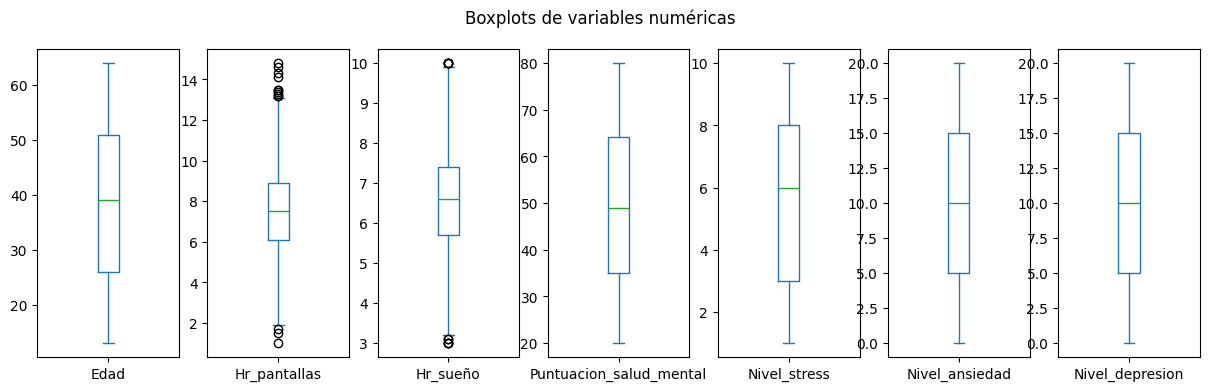

In [1443]:
# Boxplot conjunto
df[["Edad","Hr_pantallas", "Hr_sueño","Puntuacion_salud_mental", "Nivel_stress", "Nivel_ansiedad", "Nivel_depresion"]].plot(kind='box', subplots=True, layout=(1, 7), figsize=(15, 4))
plt.suptitle('Boxplots de variables numéricas')
plt.show()


**Interpretación:**
Sólo se evidencian Outliers en las variables horas pantallas y horas sueño, las cuales se ajustaron mediante el mecanismo de limpieza escalonado. Las demás variables no registran Outliers por tratarse de variables con valores determinados por escalas de puntaje.

 #### **6. IMPLEMENTACIÓN ALGORITMO K-Nearest Neighbors (KNN)**



#### **Estudio de caso: Afectación Salud Mental**

In [1447]:
import pandas as pd
from IPython.display import FileLink
 
# Leer el archivo CSV original
df = pd.read_csv('../datos/dt4_salud_mental.csv')
 
# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()
 
# Crear la columna 'Alta_Afectación_Mental' en función de 'Puntuacion_salud_mental' y Horas Pantallas

df.columns = df.columns.str.strip()
var1 = df["Puntuacion_salud_mental"] >= 54
var2 = df["Hr_pantallas"] >= 12
df["Alta_Afectacion_Mental"] = ((var1) & (var2)).astype(int)
 
# Verificar que la columna se haya añadido correctamente
print(df.columns)  # Verifica que la columna está en el DataFrame
 
# Guardar el DataFrame con la nueva columna como un archivo CSV
df.to_csv('dt7_salud_mental_psm.csv', index=False)
 
# Crear un enlace de descarga en Jupyter
FileLink('dt7_salud_mental_psm.csv')
 

Index(['user_id', 'Edad', 'Genero', 'Tipo_ubicacion', 'Hr_pantallas',
       'Hr_uso_movil', 'Hr_uso_portatil', 'Hr_uso_tablet', 'Hr_uso_tv',
       'Hr_sueño', 'Nivel_stress', 'Actividad_fisica',
       'Puntuacion_salud_mental', 'Nivel_ansiedad', 'Nivel_depresion',
       'Alta_Afectacion_Mental'],
      dtype='object')


/workspaces/Trabajo_Final_Analisis_Predictivo/session-01/dt7_salud_mental_psm.csv

**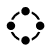Cargue de datos limpios**

In [1445]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar datos limpios
df = pd.read_csv('../datos/dt7_salud_mental_psm.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../datos/dt7_salud_mental_psm.csv'

**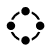Separamos variables predictoras y variable objetivo**

In [ ]:
X = df.drop(columns=['user_id', "Hr_pantallas", 'Puntuacion_salud_mental', 'Alta_Afectacion_Mental'])
y = df['Alta_Afectacion_Mental']


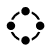**División en entrenamiento y prueba**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

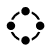**Clasificación de variables categóricas**

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinear columnas en caso de que falte alguna categoría en test o train
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

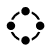**Escalado de variables numéricas**

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

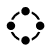 **Entrenamiento y predicción con el Modelo KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

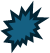**Evaluación del Modelo**

In [ ]:
print("Exactitud:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))

Exactitud: 0.82
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       500
           1       0.30      0.06      0.10       100

    accuracy                           0.82       600
   macro avg       0.57      0.52      0.50       600
weighted avg       0.75      0.82      0.77       600



#### **Evaluación del Modelo - Resultados y Análisis**

**Interpretación:** Sección 4

#### 🔸 **Visualización Matriz de Confusión**

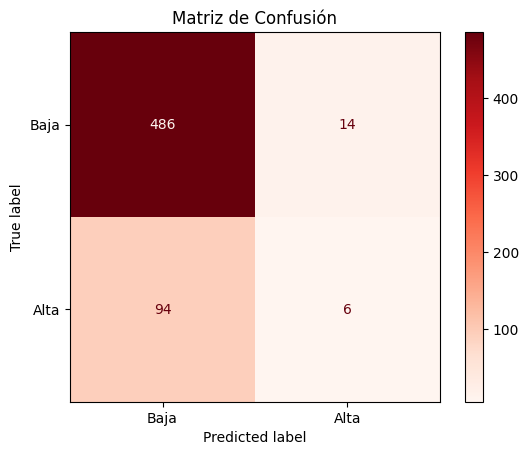

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baja", "Alta"])
disp.plot(cmap="Reds", values_format="d")
plt.title("Matriz de Confusión")
plt.show()


**Interpretación:**

#### 🔸**Visualización Curva ROC y AUC**

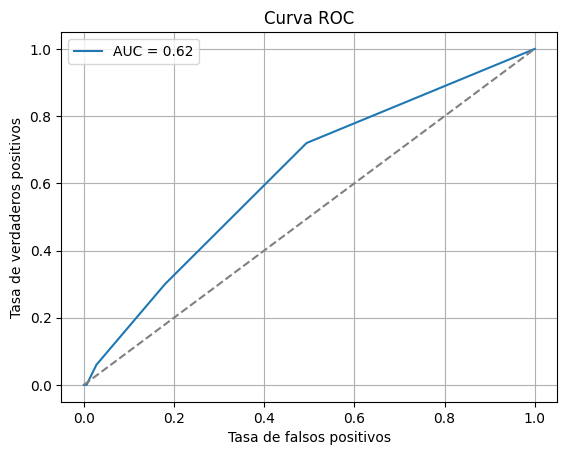

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

Interpretación:

#### 🔸**Visualización Gráfico de Barras de Métricas por Clase**

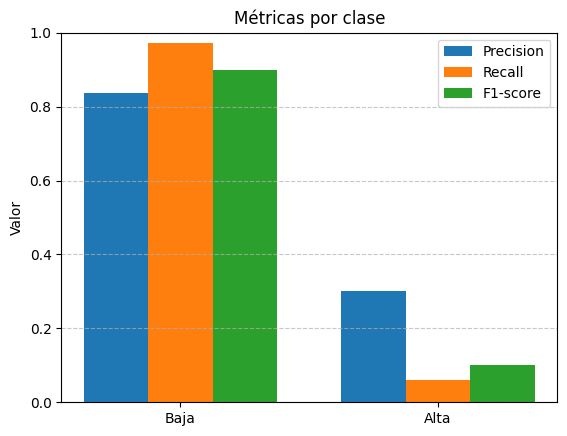

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

metrics = precision_recall_fscore_support(y_test, y_pred, zero_division=0)
labels = ["Baja", "Alta"]
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, metrics[0], width, label='Precision')
ax.bar(x, metrics[1], width, label='Recall')
ax.bar(x + width, metrics[2], width, label='F1-score')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.set_ylabel("Valor")
ax.set_title("Métricas por clase")
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Interpretación:**

#### **7. REGRESIÓN LOGÍSTICA — DIAGNÓSTICO Y CORRECCIÓN DEL MODELO**

##### **Importación de librerías y carga de datos**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt 


